1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

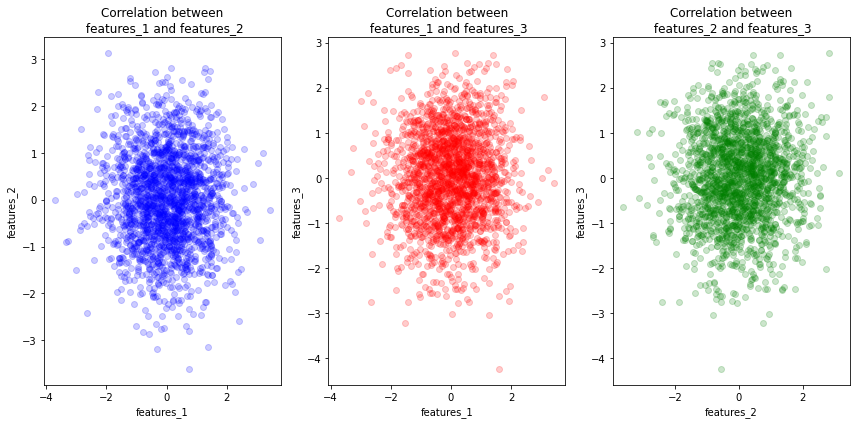

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
#!cat data/regression_generated.csv
file = 'data/regression_generated.csv'
df = pd.read_csv(file)
fig_a, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

ax1.scatter(df['features_1'], df['features_2'], color = 'blue', alpha=0.2)
ax1.set_title('Correlation between\n features_1 and features_2')
ax1.set_xlabel('features_1')
ax1.set_ylabel('features_2')
ax2.scatter(df['features_1'], df['features_3'], color = 'red', alpha=0.2)
ax2.set_title('Correlation between\n features_1 and features_3')
ax2.set_xlabel('features_1')
ax2.set_ylabel('features_3')
ax3.scatter(df['features_2'], df['features_3'], color = 'green', alpha=0.2)
ax3.set_title('Correlation between\n features_2 and features_3')
ax3.set_xlabel('features_2')
ax3.set_ylabel('features_3')
fig_a.tight_layout()

---- In order to observe a correlation between the features, we should observe the points distributing along a line, therefore we can observe that there is no correlation between the selected features ----

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

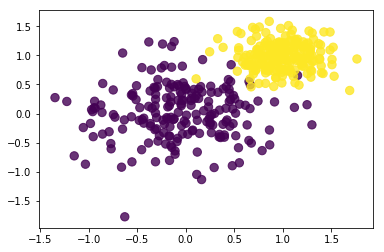

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

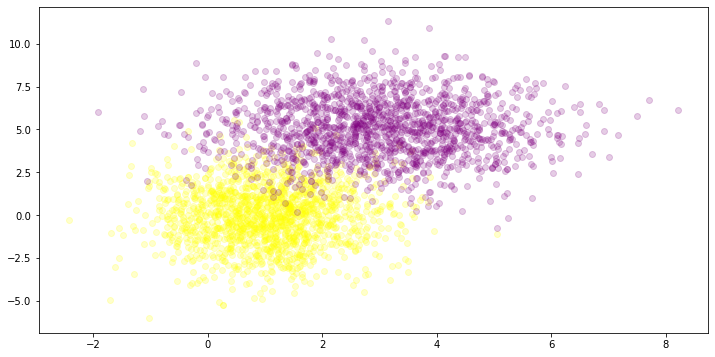

In [3]:
n=1500

#a1 = np.random.normal(loc= -5, scale=1.3, size=n)
#a2 = np.random.normal(loc= 8, scale=1.5, size=n)
ax, ay = np.random.multivariate_normal(mean = [1, 0], cov = [[1, 0], [0,3]], size=n).T
bx, by = np.random.multivariate_normal(mean = [3, 5], cov = [[2, 0], [0,3]], size=n).T
#columns = ['A', 'B','c']
columns = ['A', 'B']
#l = [a1, a2]
#df = pd.DataFrame(a1, columns = ['A'])
#df['B'] = a2
#df


#print(type(np.random.randn(n, len(columns))))

fig_b, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
#x = np.linspace(-2, 2, n)
#x = np.linspace(80, 80 + 3 * 1.3, len(df['A']))
#ax1.scatter(x, df['A'], color = 'blue', alpha=0.2)
#ax1.scatter(x, df['B'], color = 'red', alpha=0.2)
ax1.scatter(ax, ay, color = 'yellow', alpha = 0.2)
ax1.scatter(bx, by, color = 'purple', alpha = 0.2)

#ax1.set_title('')
#ax1.set_xlabel('features_1')
#ax1.set_ylabel('features_2')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


<ErrorbarContainer object of 3 artists>

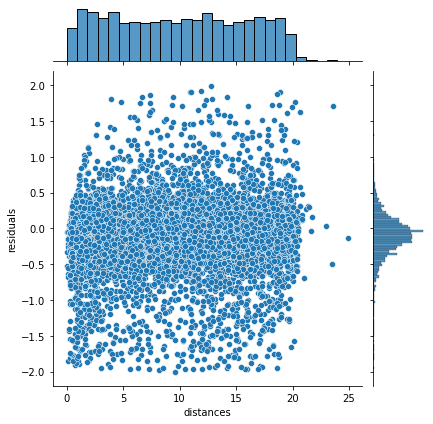

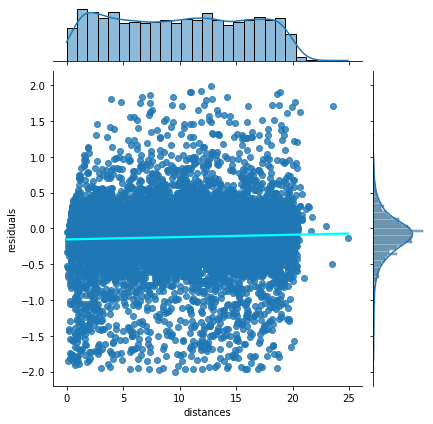

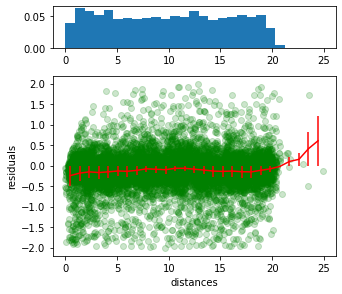

In [4]:
import pickle
import seaborn as sns
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

filename = 'data/residuals_261.pkl'

d = np.array(np.load(filename, allow_pickle = True))

df = pd.DataFrame(d[()])
df = df.loc[abs(df['residuals'])<2, :]
sns.jointplot(x="distances", y="residuals", data=df)
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={'line_kws':{'color':'cyan'}})
print(df)
#we can now observe that since the regression line is almost parallel to the x-axis of the graph (distances)
#there is no correleation between the data
 
fig_c = plt.figure()

gs = plt.GridSpec(4,4)
ax_joint = fig_c.add_subplot(gs[1:4,0:3])

ax_marg_x = fig_c.add_subplot(gs[0,0:3])

ax_joint.scatter(df['distances'], df['residuals'], color = 'green', alpha = 0.2)

h, bins, _ = ax_marg_x.hist(df['distances'], bins='auto', density=True, cumulative=False)

fig_c.tight_layout()

ax_joint.set_xlabel('distances')
ax_joint.set_ylabel('residuals')

x = np.array((bins[:-1] + bins[1:]) / 2)

y = np.array([])
i = 0
for v in bins:
    if v != 0:
        if i == 0:
            r_mean = df.loc[df['distances']<v, 'residuals'].mean()
            y = np.append(y, [r_mean])
            i+=1
        else:
            r_mean = df.loc[(df['distances']<v) & (df['distances']>bins[i-1]), 'residuals'].mean()
            y = np.append(y, [r_mean])
            i+=1

err_y = np.array([])
i = 0
for v in bins:
    if v != 0:
        if i == 0:
            std = df.loc[df['distances']<v, 'residuals'].std()
            err_y = np.append(err_y, [std])
            i+=1
        else:
            std = df.loc[(df['distances']<v) & (df['distances']>bins[i-1]), 'residuals'].std()
            err_y = np.append(y, [std])
            i+=1
err_y.resize(len(err_y)-1)

ax_joint.errorbar(x=x, y=y, yerr=err_y, color='red')

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


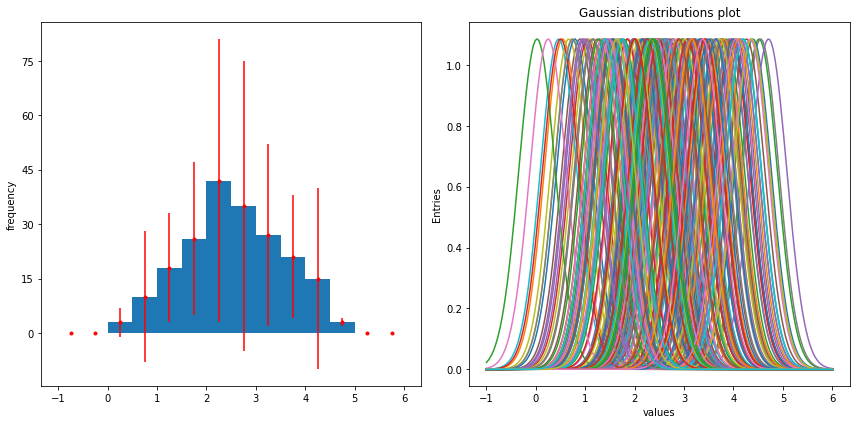

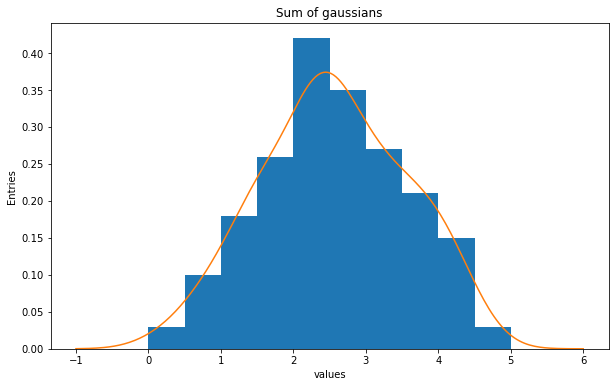

In [7]:
from matplotlib.ticker import MaxNLocator
import scipy
from scipy.stats import norm

mean = 2.6
std = 1
x=np.random.normal(mean,std,200)

fig_d, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
h, bins, _ = ax1.hist(x, bins = 'auto', range = (-1, 6))

ax1.set_ylabel('frequency')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

t = np.array((bins[:-1] + bins[1:]) / 2)
ax1.errorbar(t, h, yerr=np.random.poisson(h,len(bins)-1), fmt='r.')

fig_d.tight_layout()

dt_std = 1.06*scipy.stats.tstd(x)*len(x)**(-1/5)
g = []
l =np.linspace(-1, 6, 200)
for i in x:
    g.append(norm.pdf(l, i, dt_std))
    ax2.plot(l,g[-1])
    
ax2.set_title('Gaussian distributions plot')
ax2.set_xlabel('values')
ax2.set_ylabel('Entries')
fig_d.tight_layout()

g = np.array(g)
sum_g = np.sum(g)
n_sum = sum_g/g.shape[0]

#p = scipy.integrate.trapz(g, l)
p = np.zeros(g.shape[0])
for v in g:
    for i in range(g.shape[0]):
        p[i]=p[i]+v[i]

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins='auto', range=(-1,6), density=True, cumulative=False)
plt.plot(l,p/g.shape[0]) 
ax = fig.axes[0]
ax.set_title('Sum of gaussians')
ax.set_xlabel('values')
ax.set_ylabel('Entries')
plt.show()
